## Importações e seleção dos dados

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import statsmodels.api as sm

In [70]:
df1 = pd.read_csv('base_rotulos.csv')

/var/folders/qh/0y24swzd4_z3zrrk6dvrgvqh0000gn/T/ipykernel_7524/184671249.py:1: DtypeWarning: Columns (12,24,32,33,34,82,83,84,95,96,97,98,111,158,159,164,176,177,178,179,180,189,203,204,213,235,255,261) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('base_rotulos.csv')


In [71]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5814 entries, 0 to 5813
Columns: 335 entries, nquest to PESOE
dtypes: int64(124), object(211)
memory usage: 14.9+ MB


In [72]:
df1 = df1[['nquest', 'idade1', 'faixa etária', 'sexo', 'cor', 'REGIAO', 'RCLASSE2', 'estcivil', 'renda', 'escola', 'nfilhos', 'p52aa', 'p55', 'p56', 'p66', 'p67a', 'p68', 'p27', 'p28' ]]

In [73]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5814 entries, 0 to 5813
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   nquest        5814 non-null   int64 
 1   idade1        5814 non-null   int64 
 2   faixa etária  5814 non-null   object
 3   sexo          5814 non-null   object
 4   cor           5814 non-null   object
 5   REGIAO        5814 non-null   object
 6   RCLASSE2      5814 non-null   object
 7   estcivil      5814 non-null   object
 8   renda         5814 non-null   object
 9   escola        5814 non-null   object
 10  nfilhos       5814 non-null   int64 
 11  p52aa         5814 non-null   object
 12  p55           5814 non-null   object
 13  p56           5814 non-null   object
 14  p66           5814 non-null   object
 15  p67a          5814 non-null   object
 16  p68           5814 non-null   object
 17  p27           5814 non-null   object
 18  p28           5814 non-null   object
dtypes: int

In [74]:
df2 = pd.read_csv('base_valores.csv')

In [75]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5814 entries, 0 to 5813
Columns: 335 entries, nquest to PESOE
dtypes: int64(333), object(2)
memory usage: 14.9+ MB


In [76]:
df2 = df2[['nquest', 'rendacat', 'escolacat', 'p64b', 'p64g', 'p64h' ]]
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5814 entries, 0 to 5813
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   nquest     5814 non-null   int64
 1   rendacat   5814 non-null   int64
 2   escolacat  5814 non-null   int64
 3   p64b       5814 non-null   int64
 4   p64g       5814 non-null   int64
 5   p64h       5814 non-null   int64
dtypes: int64(6)
memory usage: 272.7 KB


## Trabalhando no df

In [77]:
df_invest = pd.merge(df1, df2, on=['nquest'], how='inner')

In [78]:
df_invest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5814 entries, 0 to 5813
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   nquest        5814 non-null   int64 
 1   idade1        5814 non-null   int64 
 2   faixa etária  5814 non-null   object
 3   sexo          5814 non-null   object
 4   cor           5814 non-null   object
 5   REGIAO        5814 non-null   object
 6   RCLASSE2      5814 non-null   object
 7   estcivil      5814 non-null   object
 8   renda         5814 non-null   object
 9   escola        5814 non-null   object
 10  nfilhos       5814 non-null   int64 
 11  p52aa         5814 non-null   object
 12  p55           5814 non-null   object
 13  p56           5814 non-null   object
 14  p66           5814 non-null   object
 15  p67a          5814 non-null   object
 16  p68           5814 non-null   object
 17  p27           5814 non-null   object
 18  p28           5814 non-null   object
 19  rendac

In [79]:
df_invest['perfil'] = df_invest['p66'].apply(lambda x: 'apostador' if x == 'Frequentemente' else 'investidor')

In [80]:
df_invest

,nquest,idade1,faixa etária,sexo,cor,REGIAO,RCLASSE2,estcivil,renda,escola,...,p67a,p68,p27,p28,rendacat,escolacat,p64b,p64g,p64h,perfil
0,192956123,54,45-59,Feminino,Preta,Nordeste,D/E,Viuvo(a),"Até R$ 1.320,00",Fundamental II completo,...,0,0,55,Ja comecou uma reserva para a aposentadoria,9,3,5,5,5,investidor
1,192957178,67,60+,Feminino,Branca,Nordeste,D/E,Viuvo(a),"De R$ 1.321,00 Até R$ 2.640,00",Analfabeto/ Fundamental I incompleto,...,0,0,0,0,1,1,5,5,1,investidor
2,192958083,44,35-44,Feminino,Preta,Nordeste,C2,Casado(a)/com companheiro(a),"Até R$ 1.320,00",Ensino Médio completo,...,0,0,45,Ja comecou uma reserva para a aposentadoria,9,5,5,1,1,investidor
3,192958117,35,35-44,Feminino,Parda,Nordeste,D/E,Solteiro (a),"Até R$ 1.320,00",Fundamental I completo/ Fundamental II incompleto,...,0,0,60,Ainda Não comecou uma reserva para a aposentad...,9,2,5,5,1,investidor
4,192958632,69,60+,Feminino,Parda,Nordeste,C2,Separado/Divorciado,Recusa,Ensino Médio completo,...,0,0,0,0,97,5,1,1,1,investidor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5809,193921867,50,45-59,Masculino,Branca,Sul,B2,Solteiro (a),"De R$ 3.961,00 Até R$ 6.600,00",Pós-graduação,...,0,0,60,Ja comecou uma reserva para a aposentadoria,3,8,2,1,1,investidor
5810,193921868,29,25-34,Feminino,Branca,Sul,B2,Casado(a)/com companheiro(a),"De R$ 2.640,00 Até R$ 3.960,00",Ensino Médio completo,...,0,0,35,Ja comecou uma reserva para a aposentadoria,2,5,5,2,1,investidor
5811,193921869,28,25-34,Masculino,Parda,Sul,C1,Separado/Divorciado,"De R$ 1.321,00 Até R$ 2.640,00",Fundamental I completo/ Fundamental II incompleto,...,c. Considerar como uma diversao,Uma forma de se divertir e eventualmente ganha...,50,Ainda Não comecou uma reserva para a aposentad...,1,2,5,4,1,investidor
5812,193925879,54,45-59,Feminino,Branca,Sul,B2,Casado(a)/com companheiro(a),"De R$ 2.640,00 Até R$ 3.960,00",Fundamental II completo,...,0,0,"Aposentou,mas continua trabalhado",0,2,3,5,1,1,investidor


In [81]:
df_invest.to_csv('base_final.csv', index=False)

## Entendendo os dados

In [82]:
df_invest.isnull().sum()

nquest          0
idade1          0
faixa etária    0
sexo            0
cor             0
REGIAO          0
RCLASSE2        0
estcivil        0
renda           0
escola          0
nfilhos         0
p52aa           0
p55             0
p56             0
p66             0
p67a            0
p68             0
p27             0
p28             0
rendacat        0
escolacat       0
p64b            0
p64g            0
p64h            0
perfil          0
dtype: int64

In [83]:
df_invest.dtypes

nquest           int64
idade1           int64
faixa etária    object
sexo            object
cor             object
REGIAO          object
RCLASSE2        object
estcivil        object
renda           object
escola          object
nfilhos          int64
p52aa           object
p55             object
p56             object
p66             object
p67a            object
p68             object
p27             object
p28             object
rendacat         int64
escolacat        int64
p64b             int64
p64g             int64
p64h             int64
perfil          object
dtype: object

In [84]:
df_invest.describe().T

,count,mean,std,min,25%,50%,75%,max
nquest,5814.0,1.932473e+08,194582.029632,192956123.0,1.930918e+08,193176180.0,1.933947e+08,193925880.0
idade1,5814.0,4.113158e+01,16.320284,16.0,2.700000e+01,40.0,5.400000e+01,90.0
nfilhos,5814.0,1.517028e+00,1.626051,0.0,0.000000e+00,1.0,2.000000e+00,10.0
rendacat,5814.0,9.498280e+00,20.066608,1.0,1.000000e+00,4.0,9.000000e+00,99.0
escolacat,5814.0,4.400585e+00,1.800569,1.0,3.000000e+00,5.0,5.000000e+00,8.0
p64b,5814.0,4.543516e+00,4.966679,1.0,4.000000e+00,5.0,5.000000e+00,99.0
p64g,5814.0,2.767458e+00,6.651658,1.0,1.000000e+00,1.0,4.000000e+00,99.0
p64h,5814.0,2.424321e+00,4.699616,1.0,1.000000e+00,1.0,4.000000e+00,99.0


## Análise do Perfil

### idade vs perfil

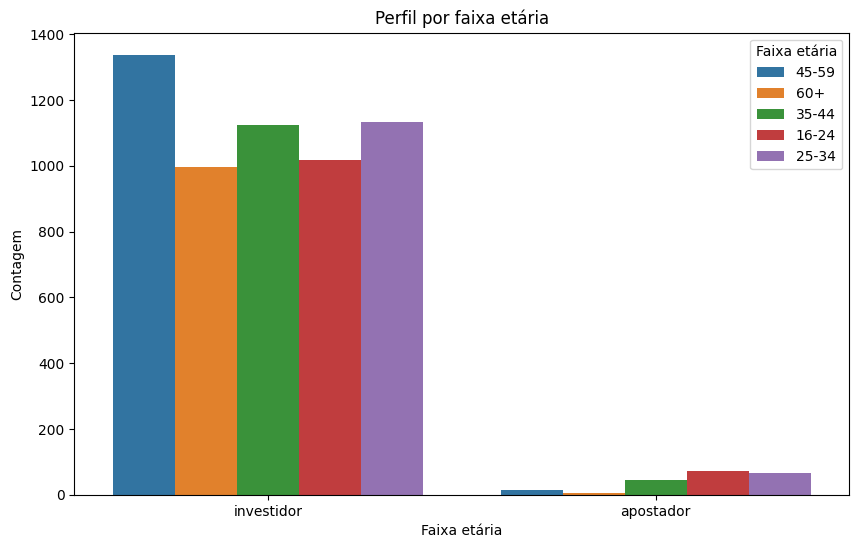

In [85]:
# definir tamanho da figura
plt.figure(figsize=(10, 6))


sns.countplot(data = df_invest,
              x = 'perfil', 
              hue = 'faixa etária')

# definir texto do título e eixos x e y

plt.title('Perfil por faixa etária')
plt.xlabel('Faixa etária')
plt.ylabel('Contagem')

# plotar e definir texto da legenda
plt.legend(title = 'Faixa etária')

plt.show()

### renda vs perfil

In [86]:
df_invest.groupby('perfil')['renda'].value_counts(normalize=True)

perfil      renda                           
apostador   Até R$ 1.320,00                     0.305419
            De R$ 1.321,00 Até R$ 2.640,00      0.295567
            De R$ 2.640,00 Até R$ 3.960,00      0.192118
            De R$ 3.961,00 Até R$ 6.600,00      0.103448
            De R$ 6.601,00 Até R$ 13.200,00     0.039409
            Não sabe                            0.024631
            De R$ 13.201,00 Até R$ 26.400,00    0.019704
            Recusa                              0.014778
            R$ 66.001,00 ou mais                0.004926
investidor  Até R$ 1.320,00                     0.433078
            De R$ 1.321,00 Até R$ 2.640,00      0.253965
            De R$ 2.640,00 Até R$ 3.960,00      0.126181
            De R$ 3.961,00 Até R$ 6.600,00      0.080200
            De R$ 6.601,00 Até R$ 13.200,00     0.042773
            Não sabe                            0.035110
            Recusa                              0.012119
            De R$ 13.201,00 Até R$ 26.400,0

In [87]:
relacao = pd.crosstab(df_invest['perfil'], df_invest['renda'])
relacao

renda,"Até R$ 1.320,00","De R$ 1.321,00 Até R$ 2.640,00","De R$ 13.201,00 Até R$ 26.400,00","De R$ 2.640,00 Até R$ 3.960,00","De R$ 26.401,00 Até R$ 66.000,00","De R$ 3.961,00 Até R$ 6.600,00","De R$ 6.601,00 Até R$ 13.200,00",Não sabe,"R$ 66.001,00 ou mais",Recusa
perfil,,,,,,,,,,
apostador,62,60,4,39,0,21,8,5,1,3
investidor,2430,1425,67,708,18,450,240,197,8,68


In [88]:
#O nível de significância foi menor que 0.05 (0.01), então rejeitamos a hipótese nula de que não há associação entre as variáveis.
# Isso sugere que existe uma relação significativa entre ser um investidor ou apostador e a renda.
chi2, p, dof, expected = chi2_contingency(relacao)
print(f'Estatística Qui-Quadrado: {chi2}')
print(f'Valor-p: {p}')


Estatística Qui-Quadrado: 20.666416257050255
Valor-p: 0.014216826826916013


### Classe social vs perfil

In [89]:
df_invest.groupby('perfil')['RCLASSE2'].value_counts(normalize=True)

perfil      RCLASSE2
apostador   C2          0.251232
            B2          0.221675
            C1          0.201970
            D/E         0.187192
            A           0.068966
            B1          0.068966
investidor  C2          0.273926
            D/E         0.267510
            C1          0.208697
            B2          0.169845
            B1          0.049011
            A           0.031011
Name: proportion, dtype: float64

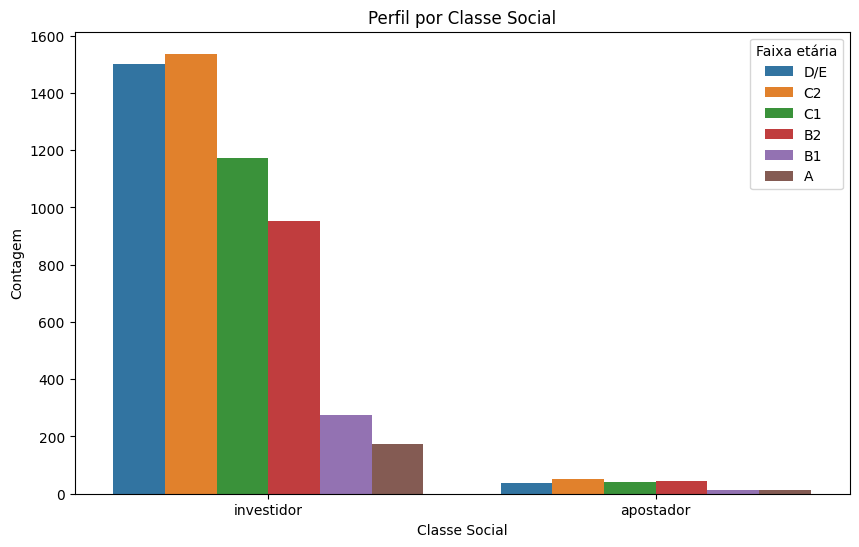

In [90]:
# definir tamanho da figura
plt.figure(figsize=(10, 6))


sns.countplot(data = df_invest,
              x = 'perfil', 
              hue = 'RCLASSE2')

# definir texto do título e eixos x e y

plt.title('Perfil por Classe Social')
plt.xlabel('Classe Social')
plt.ylabel('Contagem')

# plotar e definir texto da legenda
plt.legend(title = 'Faixa etária')

plt.show()

### genero vs perfil

In [91]:
resultado = df_invest.groupby('perfil')['sexo'].value_counts(normalize=True)
resultado

perfil      sexo     
apostador   Masculino    0.753695
            Feminino     0.246305
investidor  Feminino     0.525040
            Masculino    0.474960
Name: proportion, dtype: float64

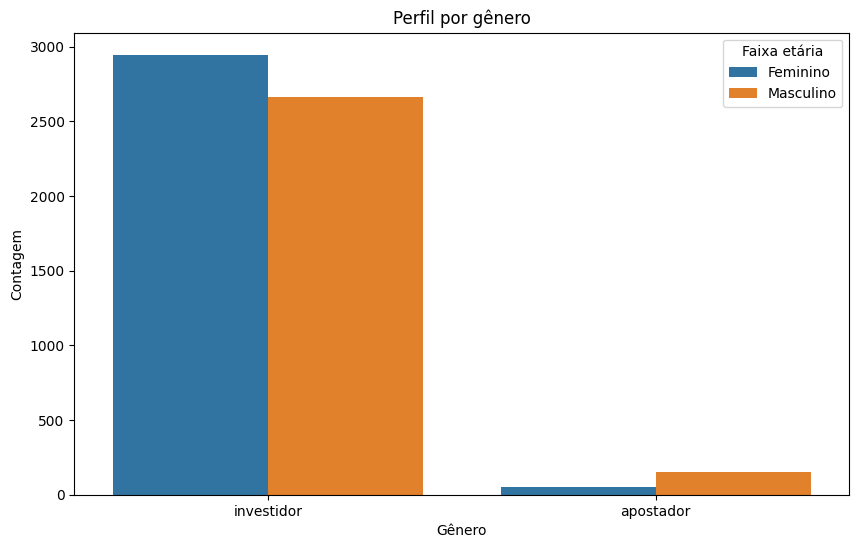

In [92]:
# definir tamanho da figura
plt.figure(figsize=(10, 6))


sns.countplot(data = df_invest,
              x = 'perfil', 
              hue = 'sexo')

# definir texto do título e eixos x e y

plt.title('Perfil por gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem')

# plotar e definir texto da legenda
plt.legend(title = 'Faixa etária')

plt.show()

### regiao vs perfil

In [93]:
df_invest.groupby('perfil')['REGIAO'].value_counts(normalize=True)

perfil      REGIAO      
apostador   Sudeste         0.413793
            Nordeste        0.344828
            Sul             0.118227
            Norte           0.083744
            Centro Oeste    0.039409
investidor  Sudeste         0.431296
            Nordeste        0.262698
            Sul             0.145963
            Centro Oeste    0.080912
            Norte           0.079130
Name: proportion, dtype: float64

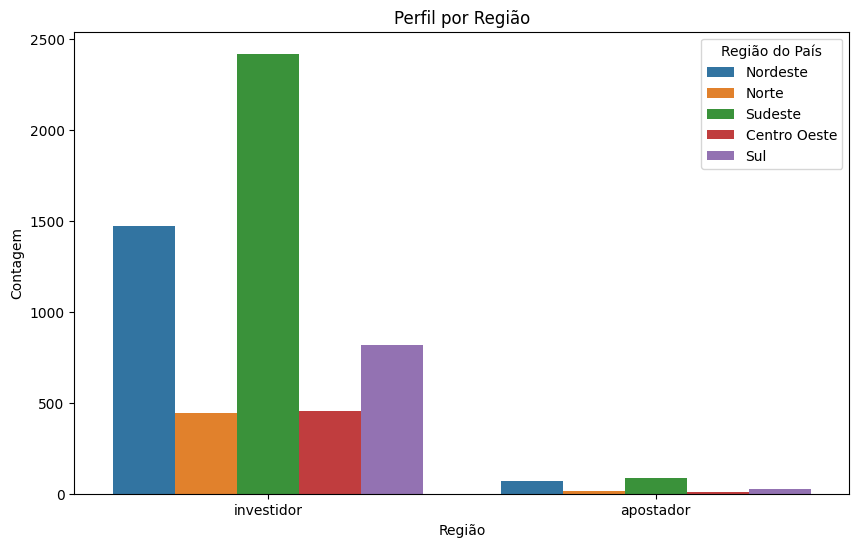

In [94]:
# definir tamanho da figura
plt.figure(figsize=(10, 6))


sns.countplot(data = df_invest,
              x = 'perfil', 
              hue = 'REGIAO')

# definir texto do título e eixos x e y

plt.title('Perfil por Região')
plt.xlabel('Região')
plt.ylabel('Contagem')

# plotar e definir texto da legenda
plt.legend(title = 'Região do País')

plt.show()

### Escolaridade vs perfil 

In [95]:
perfil_escolar = pd.pivot_table(df_invest, index='perfil', columns='escola', aggfunc='size', fill_value=0)
perfil_escolar


escola,Analfabeto/ Fundamental I incompleto,Ensino Médio completo,Ensino Médio incompleto,Fundamental I completo/ Fundamental II incompleto,Fundamental II completo,Pós-graduação,Superior completo,Superior incompleto
perfil,,,,,,,,
apostador,3,100,43,17,7,6,11,16
investidor,450,2167,740,752,359,206,538,399


In [96]:
df_invest.groupby('perfil')['escola'].value_counts(normalize=True)


perfil      escola                                           
apostador   Ensino Médio completo                                0.492611
            Ensino Médio incompleto                              0.211823
            Fundamental I completo/ Fundamental II incompleto    0.083744
            Superior incompleto                                  0.078818
            Superior completo                                    0.054187
            Fundamental II completo                              0.034483
            Pós-graduação                                        0.029557
            Analfabeto/ Fundamental I incompleto                 0.014778
investidor  Ensino Médio completo                                0.386206
            Fundamental I completo/ Fundamental II incompleto    0.134022
            Ensino Médio incompleto                              0.131884
            Superior completo                                    0.095883
            Analfabeto/ Fundamental I incompleto  

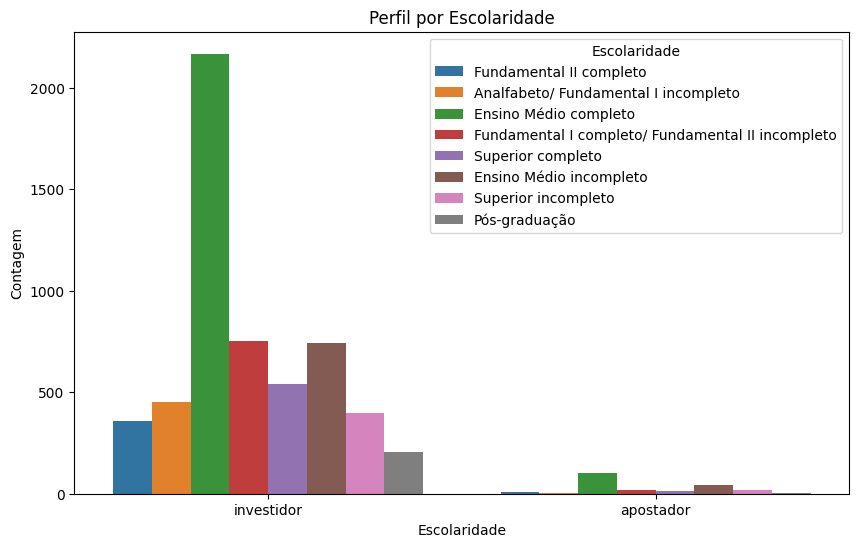

In [97]:
# definir tamanho da figura
plt.figure(figsize=(10, 6))


sns.countplot(data = df_invest,
              x = 'perfil', 
              hue = 'escola')

# definir texto do título e eixos x e y

plt.title('Perfil por Escolaridade')
plt.xlabel('Escolaridade')
plt.ylabel('Contagem')

# plotar e definir texto da legenda
plt.legend(title = 'Escolaridade')

plt.show()

### Raça vs perfil

In [98]:
perfil_raca = pd.pivot_table(df_invest, index='perfil', columns='cor', aggfunc='size', fill_value=0)
perfil_raca

cor,Amarela,Branca,Indigena,Outras,Parda,Preta
perfil,,,,,,
apostador,8,50,2,7,89,47
investidor,120,1740,78,235,2439,999


In [99]:
perfil_raca_porcentagem = perfil_raca.div(perfil_raca.sum(axis=1), axis=0)*100
perfil_raca_porcentagem

cor,Amarela,Branca,Indigena,Outras,Parda,Preta
perfil,,,,,,
apostador,3.940887,24.630542,0.985222,3.448276,43.842365,23.152709
investidor,2.138656,31.010515,1.390127,4.188202,43.468187,17.804313


### Estado Civil vs perfil

In [100]:
perfil_estciv = pd.pivot_table(df_invest, index='perfil', columns='estcivil', aggfunc='size', fill_value=0)
perfil_estciv_porcentagem = perfil_estciv.div(perfil_estciv.sum(axis=1), axis=0)*100
perfil_estciv_porcentagem

estcivil,Casado(a)/com companheiro(a),Separado/Divorciado,Solteiro (a),Viuvo(a)
perfil,,,,
apostador,34.482759,3.448276,60.591133,1.477833
investidor,41.525575,9.517020,43.788986,5.168419


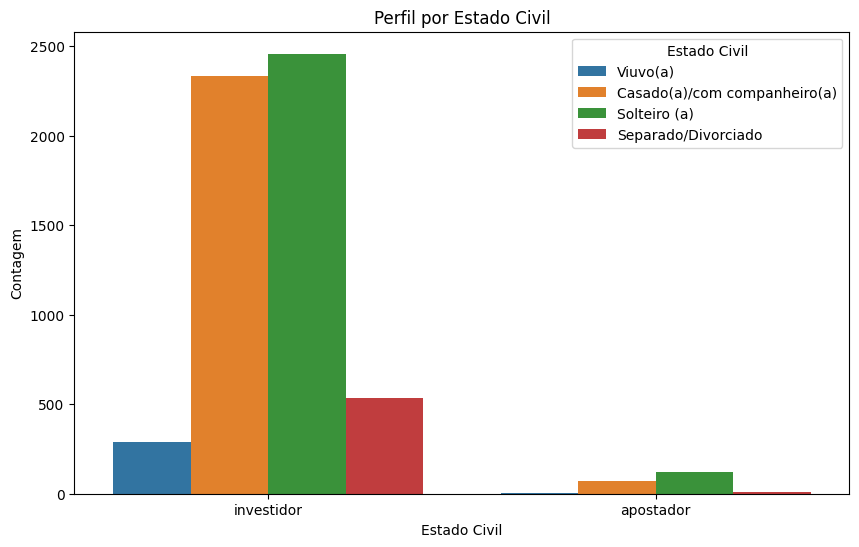

In [169]:
# definir tamanho da figura
plt.figure(figsize=(10, 6))


sns.countplot(data = df_invest,
              x = 'perfil', 
              hue = 'estcivil')

# definir texto do título e eixos x e y

plt.title('Perfil por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Contagem')

# plotar e definir texto da legenda
plt.legend(title = 'Estado Civil')

plt.show()

### Quantidade de filhos vs perfil

In [101]:
perfil_nfilhos = pd.pivot_table(df_invest, index='perfil', columns='nfilhos', aggfunc='size', fill_value=0)
perfil_nfilhos_porcentagem = perfil_nfilhos.div(perfil_nfilhos.sum(axis=1), axis=0)*100
perfil_nfilhos_porcentagem

nfilhos,0,1,2,3,4,5,6,7,8,9,10
perfil,,,,,,,,,,,
apostador,50.738916,22.660099,14.778325,6.896552,2.463054,0.492611,1.477833,0.000000,0.000000,0.492611,0.00000
investidor,35.287827,20.139013,21.154874,12.742827,5.471395,2.637676,1.407949,0.481198,0.285154,0.142577,0.24951


## Impacto relações próximas

In [127]:
#p64g - QUESTõES FINANCEIRAS FREQUENTEMENTE SãO MOTIVO DE DISCÓRDIA NA MINHA CASA'
#p64h - eu já briguei com amigos e/ou familiares por causa de dinheiro

contagem_discordia = df_invest.groupby('perfil')['p64g'].value_counts(normalize=True) *100
contagem_briga = df_invest.groupby('perfil')['p64h'].value_counts(normalize=True) * 100

resultado_impacto = pd.DataFrame({
    'p64g': contagem_discordia,
    'p64h': contagem_briga
}).fillna(0)

print(resultado_discordia)


                    p64g       p64h
perfil                             
apostador  1   49.261084  46.798030
           2    8.866995  10.837438
           3    0.492611   0.000000
           4   17.241379   8.866995
           5   23.645320  33.497537
           99   0.492611   0.000000
investidor 1   51.345571  60.256639
           2   15.041882   8.750668
           3    0.588130   0.302976
           4   14.453752  10.835858
           5   18.125111  19.639993
           99   0.445553   0.213866


#### Criando o constructo

## Como se informam

In [157]:
#p52aa- quais canais usa para se informar? 

canais = df_invest[df_invest['p52aa'] != '0']

canais.groupby('perfil')['p52aa'].value_counts(normalize=True)


perfil      p52aa             
apostador   Youtube               0.404762
            Instagram             0.273810
            WhatsApp              0.107143
            Portal / site         0.059524
            Televisao             0.047619
            Linkedin              0.023810
            Podcasts              0.023810
            Telegram              0.023810
            E-mail                0.011905
            Facebook              0.011905
            Nenhum                0.011905
investidor  Youtube               0.348072
            Portal / site         0.133162
            Instagram             0.121337
            Nenhum                0.100257
            Televisao             0.098201
            WhatsApp              0.074036
            Radio                 0.035990
            Revistas / jornais    0.023136
            Linkedin              0.018509
            E-mail                0.013368
            Podcasts              0.011825
            Facebook   

In [160]:
#p55 - você já chegou a procurar informações e dicas sobre onde aplicar dinheiro?
buscou = df_invest[df_invest['p55'] != '0']

buscou.groupby('perfil')['p55'].value_counts(normalize=True)

perfil      p55
apostador   Nao    0.612613
            Sim    0.387387
investidor  Nao    0.724714
            Sim    0.275286
Name: proportion, dtype: float64

In [161]:
#p56 - onde buscou essas informações?
onde = df_invest[df_invest['p56'] != '0']

onde.groupby('perfil')['p56'].value_counts(normalize=True)

perfil      p56                                                                                                                     
apostador   Internet/ Google/ Redes Sociais (Facebook, Instagram)/ YouTube                                                              0.325581
            Amigos/ Parentes                                                                                                            0.279070
            Sites de noticias                                                                                                           0.232558
            Aplicativos de corretoras e investimentos (do banco/ bancos digitais)                                                       0.046512
            Presencialmente, ou seja, falando com o gerente ou com o assessor/ especialista de investimento. (presencialmente na age    0.046512
            Banco/ gerente de banco (sem especificar)                                                                                   0.0232